# TASK 2 (GRIP): K- Means Clustering

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# optimum number of clusters for K Means

In [8]:
X=df.drop("Species",axis=1)
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [9]:
#import model
from sklearn.cluster import KMeans


In [10]:
#to find cluster we plot elbow plot
elbow=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,max_iter=300,n_init=10,init='k-means++')
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
        

In [11]:
elbow

[281918.32439999987,
 70616.29893333331,
 31326.886800000007,
 17810.130243036554,
 11441.955184649614,
 7926.973612820517,
 5923.945246470921,
 4556.4484802201605,
 3590.9763790849684,
 2958.618625]

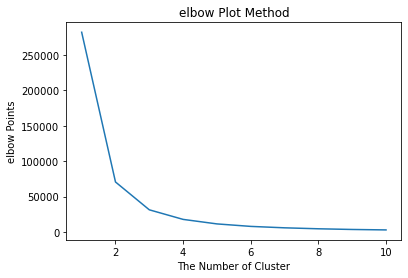

In [12]:
plt.plot(range(1,11),elbow)
plt.title("elbow Plot Method")
plt.xlabel("The Number of Cluster")
plt.ylabel("elbow Points")
plt.show()

From the gap we can determine that 3 is the right cluster

In [13]:
kmeans=KMeans(n_clusters=3,max_iter=300,n_init=10,init='k-means++')
kmeans.fit(X)
y_kmeans=kmeans.predict(X)
y_kmeans


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

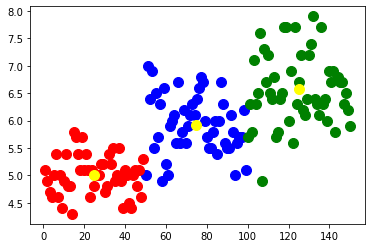

In [14]:
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X.iloc[y_kmeans ==1,0], X.iloc[y_kmeans == 1,1], 
            s = 100, c ="green", label = 'Iris-setosa')
plt.scatter(X.iloc[y_kmeans ==2,0], X.iloc[y_kmeans ==2,1], 
            s = 100, c ="red", label = 'Iris-setosa')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.show()

In [15]:
#Plotting the centroid on the gaps above
kmeans.cluster_centers_

array([[ 74.5       ,   5.922     ,   2.78      ,   4.206     ,
          1.304     ],
       [125.        ,   6.57058824,   2.97058824,   5.52352941,
          2.01176471],
       [ 25.        ,   5.00612245,   3.42040816,   1.46530612,
          0.24489796]])